In [1]:
import pandas as pd               
import matplotlib.pyplot as plt   

# Data types and methods for dealing with dates and time. Name it dt for short.
import datetime as dt             

# This following is a jupyter magic command. 
# It tells jupyter to insert the plots into the notebook rather than a new window.


import pandas_datareader
import numpy as np
# We are importing the data method from the package and calling it web. 
import pandas_datareader.data as web    
import requests
import os
from bs4 import BeautifulSoup
import geopandas                            # geopandas for maps work
from shapely.geometry import Point          # shapely handles the coordinate references for plotting shapes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from openpyxl import Workbook
from openpyxl.worksheet.datavalidation import DataValidation
import openpyxl
from openpyxl import Workbook
from openpyxl import load_workbook
import xlwings as xw

This file and its complementary Excel file is modified with pseudodata and shortened, as most of the data is confidencial. 

In [2]:
startyear=2015
listofyears = []
for i in range(8):
    listofyears.append(startyear+i)
#listofyears=np.linspace(2015, 2030,1)
print(listofyears)

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [3]:
#the 811 file the final refined version for formulas 
batpac=xw.Book('BatPaC 5.0 - with direct reference 7.19 version.xlsm')
dashboard=batpac.sheets['Dashboard']
python=batpac.sheets['python']
cathode=batpac.sheets['cathode analysis']

In [4]:
listofcountry=['US','China']
listofbattery=['NMC333-G (Power)','NMC532-G (Power)','NMC622-G (Power)','NMC811-G (Power)','LFP-G (Power)']
listofcost=['Cathode','Anode','Separator','Electrolyte','Other materials and maintenance (warranty+cell container)',
            'Module Construction','Pack Construction','Manufacturing, land, and depreciation']

In [5]:
#cathode for 811
cathodedata811=pd.DataFrame()
for country in listofcountry:
    dashboard['E13'].value='NMC811-G (Power)'
    dashboard['H13'].value=country
    df=cathode.range('A128:Q168').options(pd.DataFrame).value
    df=df.transpose()
    df['country']=country
    cathodedata811=cathodedata811.append(df)
cathodedata811.index=cathodedata811.index.astype(int)

In [6]:
cathodedata811

NMC811-G,Sulfuric acid (H2SO4),Final Manganese,Ammonia (NH3),Nickel Sulfate (NiSO4),Cobalt Sulfate (CoSO4),Manganese Sulfate (MnSO4),Sodium Hydroxide (NaOH),Ammonium Hydroxide (NH4OH),Ni0.219Co0.125Mn0.656(OH)2,Ni0.4Co0.2Mn0.4(OH)2,...,Bauxite,Limestone (CaCO3),Aluminum sulfate (Al2(SO4)3),Hydrogen peroxide (H2O2),Soda ash (Na2CO3),Lime (CaO),manufacturing cost/pack,Other Cost/pack,Price each year/pack,country
2015,0.0,0.0,0.0,465.600027,140.095356,8.380892,22.113357,1.281821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,839.758867,US
2016,0.0,0.0,0.0,376.585371,124.891216,10.975525,22.113357,1.281821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,738.134703,US
2017,0.0,0.0,0.0,408.572560,274.543476,10.401491,22.113357,1.281821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,919.200118,US
2018,0.0,0.0,0.0,515.876823,357.731890,11.710288,22.113357,1.281821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,1877.844311,US
2019,0.0,0.0,0.0,546.097848,161.598401,11.136254,22.113357,1.281821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,1440.583029,US
2020,0.0,0.0,0.0,509.086905,140.392743,9.868788,22.113357,1.281821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,1257.081977,US
2021,0.0,0.0,0.0,724.715881,238.922340,25.257484,22.113357,1.281821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,1666.354450,US
2022,0.0,0.0,0.0,871.837326,347.356276,10.387714,22.113357,1.281821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,4165.920833,US
2023,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,202.287413,US
2024,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.287413,202.287413,US


In [7]:
listofyears

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [8]:
Wholedata1=xw.Book('wholedata 7.20 copy.xlsx')
Wholedata2=Wholedata1.sheets['Sheet1']
Wholedata=Wholedata2.range('A1:P81').options(pd.DataFrame).value
Wholedata

,country,Battery name,Cathode,"Manufacturing, land, and depreciation",Anode,Separator,Electrolyte,Module Construction,Pack Construction,Other materials and maintenance (warranty+cell container),Total pack energy,"Target rated peak power of pack, kW",Pack Cost,Number of Pack manufactured per year,pack cost per kwh
year,,,,,,,,,,,,,,,
2015.0,US,NMC333-G (Power),1889.902766,1371.371854,665.232553,227.997141,238.802423,335.819110,828.386478,366.742263,45.0,125.0,5924.254588,10000.0,131.650102
2015.0,China,NMC333-G (Power),1660.455957,1283.496225,665.232553,227.997141,238.802423,335.819110,828.386478,348.972207,45.0,125.0,5589.162093,10000.0,124.203602
2016.0,US,NMC333-G (Power),1836.852472,1331.232321,664.222774,227.997141,238.802423,331.721962,817.431502,357.958350,45.0,125.0,5806.218946,15000.0,129.027088
2016.0,China,NMC333-G (Power),1619.168248,1245.905845,664.222774,227.997141,238.802423,331.721962,817.431502,340.989751,45.0,125.0,5486.239646,15000.0,121.916437
2017.0,US,NMC333-G (Power),2498.624017,1290.299751,663.034985,227.997141,238.802423,326.902543,804.268599,388.516044,45.0,125.0,6438.445503,25000.0,143.076567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.0,China,LFP-G (Power),994.004264,1182.302339,792.882626,331.753679,310.422357,326.874841,817.205033,312.297820,45.0,125.0,5067.742961,80000.0,112.616510
2021.0,US,LFP-G (Power),1354.971744,1210.926687,791.755389,331.753679,310.422357,322.301109,803.583441,330.056993,45.0,125.0,5455.771400,150000.0,121.239364
2021.0,China,LFP-G (Power),1150.521612,1133.096062,791.755389,331.753679,310.422357,322.301109,803.583441,314.249270,45.0,125.0,5157.682921,150000.0,114.615176


In [9]:
Wholedata.index=Wholedata.index.astype(int)
Wholedata

,country,Battery name,Cathode,"Manufacturing, land, and depreciation",Anode,Separator,Electrolyte,Module Construction,Pack Construction,Other materials and maintenance (warranty+cell container),Total pack energy,"Target rated peak power of pack, kW",Pack Cost,Number of Pack manufactured per year,pack cost per kwh
year,,,,,,,,,,,,,,,
2015,US,NMC333-G (Power),1889.902766,1371.371854,665.232553,227.997141,238.802423,335.819110,828.386478,366.742263,45.0,125.0,5924.254588,10000.0,131.650102
2015,China,NMC333-G (Power),1660.455957,1283.496225,665.232553,227.997141,238.802423,335.819110,828.386478,348.972207,45.0,125.0,5589.162093,10000.0,124.203602
2016,US,NMC333-G (Power),1836.852472,1331.232321,664.222774,227.997141,238.802423,331.721962,817.431502,357.958350,45.0,125.0,5806.218946,15000.0,129.027088
2016,China,NMC333-G (Power),1619.168248,1245.905845,664.222774,227.997141,238.802423,331.721962,817.431502,340.989751,45.0,125.0,5486.239646,15000.0,121.916437
2017,US,NMC333-G (Power),2498.624017,1290.299751,663.034985,227.997141,238.802423,326.902543,804.268599,388.516044,45.0,125.0,6438.445503,25000.0,143.076567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,China,LFP-G (Power),994.004264,1182.302339,792.882626,331.753679,310.422357,326.874841,817.205033,312.297820,45.0,125.0,5067.742961,80000.0,112.616510
2021,US,LFP-G (Power),1354.971744,1210.926687,791.755389,331.753679,310.422357,322.301109,803.583441,330.056993,45.0,125.0,5455.771400,150000.0,121.239364
2021,China,LFP-G (Power),1150.521612,1133.096062,791.755389,331.753679,310.422357,322.301109,803.583441,314.249270,45.0,125.0,5157.682921,150000.0,114.615176


In [10]:
Wholedata['pack cost per kwh']=Wholedata['Pack Cost']/Wholedata['Total pack energy']
Wholedata.head(5)

,country,Battery name,Cathode,"Manufacturing, land, and depreciation",Anode,Separator,Electrolyte,Module Construction,Pack Construction,Other materials and maintenance (warranty+cell container),Total pack energy,"Target rated peak power of pack, kW",Pack Cost,Number of Pack manufactured per year,pack cost per kwh
year,,,,,,,,,,,,,,,
2015,US,NMC333-G (Power),1889.902766,1371.371854,665.232553,227.997141,238.802423,335.819110,828.386478,366.742263,45.0,125.0,5924.254588,10000.0,131.650102
2015,China,NMC333-G (Power),1660.455957,1283.496225,665.232553,227.997141,238.802423,335.819110,828.386478,348.972207,45.0,125.0,5589.162093,10000.0,124.203602
2016,US,NMC333-G (Power),1836.852472,1331.232321,664.222774,227.997141,238.802423,331.721962,817.431502,357.958350,45.0,125.0,5806.218946,15000.0,129.027088
2016,China,NMC333-G (Power),1619.168248,1245.905845,664.222774,227.997141,238.802423,331.721962,817.431502,340.989751,45.0,125.0,5486.239646,15000.0,121.916437
2017,US,NMC333-G (Power),2498.624017,1290.299751,663.034985,227.997141,238.802423,326.902543,804.268599,388.516044,45.0,125.0,6438.445503,25000.0,143.076567


In [11]:
xw.view(Wholedata)

In [12]:
WholedataNMC811=Wholedata[Wholedata['Battery name']=='NMC811-G (Power)']
packenergyNMC811=WholedataNMC811['Total pack energy'][2015].tolist()[1]
packenergyNMC811

45.0

In [13]:
cathode811us=cathodedata811[cathodedata811['country']=='US']
#cathode811us=cathode811us[cathode811us.index in [2020]]
cathode811us=cathode811us.loc[[2020,2022],:]
cathode811us=cathode811us.loc[:, ( cathode811us!= 0).any(axis=0)]
cathode811us=cathode811us.rename(columns={'Nickel Sulfate (NiSO4)':'Nickel(Ni)', 'Cobalt Sulfate (CoSO4)':'Cobalt(Co)',
                                     'Manganese Sulfate (MnSO4)':'Manganese(Mn)'})  
cathode811us.drop(columns=cathode811us.columns[-1], 
        axis=1, 
        inplace=True)
cathode811us.drop(columns=cathode811us.columns[-1], 
        axis=1, 
        inplace=True)
#cathode811us['pack cost per kwh']=packenergyNMC811
cathode811us=cathode811us/packenergyNMC811
cathode811us.sort_values(cathode811us.last_valid_index(), axis=1,ascending=False, inplace=True)

cathode811us


NMC811-G,Lithium Hydoxide (LiOH),Nickel(Ni),Cobalt(Co),Other Cost/pack,Sodium Hydroxide (NaOH),Manganese(Mn),Ammonium Hydroxide (NH4OH)
2020,8.267799,11.313042,3.119839,4.495276,0.491408,0.219306,0.028485
2022,60.236821,19.374163,7.719028,4.495276,0.491408,0.230838,0.028485


In [14]:
from itertools import chain
cathode811us_total = cathode811us.sum(axis=1)
cathode811us_rel = cathode811us[cathode811us.columns].div(cathode811us_total, 0)*100

arrcathode811us=cathode811us_rel.transpose().to_numpy()
cathode811us_list= list(chain.from_iterable(arrcathode811us))
cathode811us_list

[29.596395268175,
 65.06741329865517,
 40.49751043801798,
 20.927841912714158,
 11.168145377879005,
 8.338043126294831,
 16.09182347610419,
 4.855767085708991,
 1.7591022027936123,
 0.5308155778248298,
 0.7850552295891309,
 0.24934977646602477,
 0.10196800744105919,
 0.03076922233598201]

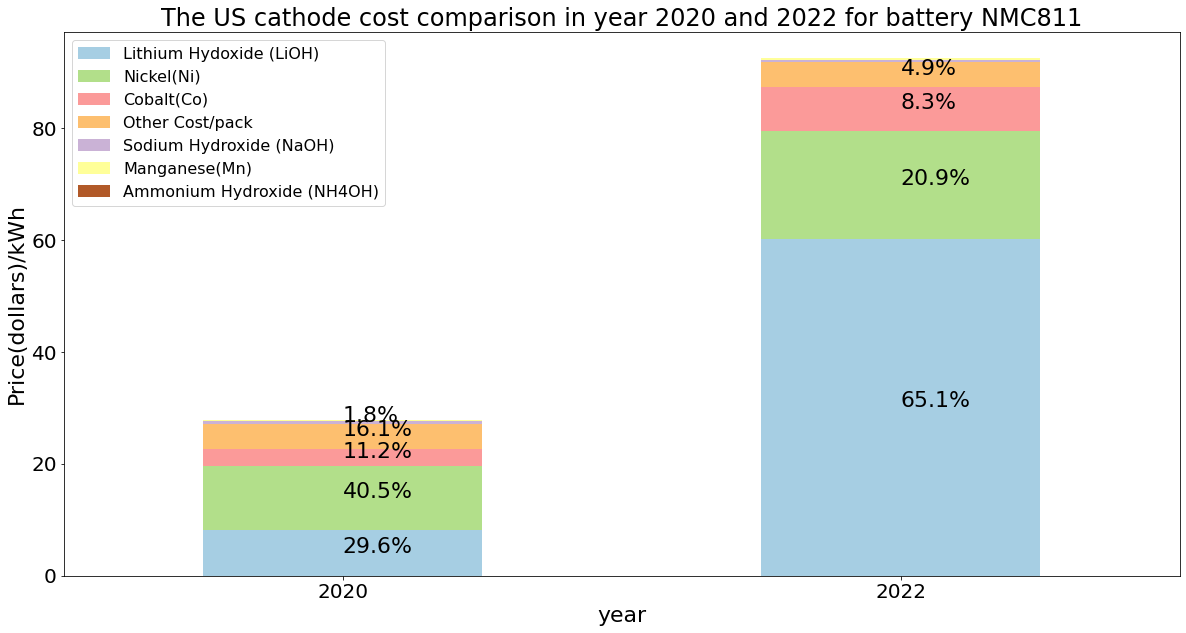

In [15]:
xsize=16
ysize=20
ax = cathode811us.plot(kind='bar', stacked=True, figsize=(20, 10), rot=0, xlabel='Class', ylabel='Count',colormap='Paired')
ax.set_ylabel('Price(dollars)/kWh',fontsize=22)
ax.set_xlabel('year',fontsize=22)
ax.set_title('The US cathode cost comparison in year 2020 and 2022 for battery NMC811',fontsize=24)

plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


for i,rec in enumerate(ax.patches):
    if cathode811us_list[i]>1.5:
        ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
                 '{:.1%}'.format(cathode811us_list[i]/100), fontsize=22, color='black')
plt.savefig('The US cathode cost comparison in year 2020 and 2022 for battery NMC811.svg')


In [16]:
cathodedata811in2022=cathodedata811.loc[[2022]]
cathodedata811in2022=cathodedata811in2022.loc[:, ( cathodedata811in2022!= 0).any(axis=0)]
cathodedata811in2022=cathodedata811in2022.rename(columns={'Nickel Sulfate (NiSO4)':'Nickel(Ni)', 'Cobalt Sulfate (CoSO4)':'Cobalt(Co)',
                                     'Manganese Sulfate (MnSO4)':'Manganese(Mn)'})  
cathodedata811in2022.drop(columns=cathodedata811in2022.columns[-2], 
        axis=1, 
        inplace=True)
#cathodedata811in2022=cathodedata811in2022/packenergyNMC811
cathodedata811in2022

NMC811-G,Nickel(Ni),Cobalt(Co),Manganese(Mn),Sodium Hydroxide (NaOH),Ammonium Hydroxide (NH4OH),Lithium Hydoxide (LiOH),Other Cost/pack,country
2022,871.837326,347.356276,10.387714,22.113357,1.281821,2710.656926,202.287413,US
2022,871.837326,347.356276,10.387714,22.113357,1.281821,2710.656926,202.287413,China


In [17]:
cathodedata811in2022us=cathodedata811in2022[cathodedata811in2022['country']=='US'].drop(columns=
                    cathodedata811in2022.columns[-1], axis=1)
cathodedata811in2022us=cathodedata811in2022us/packenergyNMC811

cathodedata811in2022us

NMC811-G,Nickel(Ni),Cobalt(Co),Manganese(Mn),Sodium Hydroxide (NaOH),Ammonium Hydroxide (NH4OH),Lithium Hydoxide (LiOH),Other Cost/pack
2022,19.374163,7.719028,0.230838,0.491408,0.028485,60.236821,4.495276


In [18]:
from itertools import chain
cathodedata811in2022us_total = cathodedata811in2022us.sum(axis=1)
cathodedata811in2022us_rel = cathodedata811in2022us[cathodedata811in2022us.columns].div(cathodedata811in2022us_total, 0)*100

arrcathodedata811in2022us=cathodedata811in2022us_rel.transpose().to_numpy()
cathodedata811in2022us_list= list(chain.from_iterable(arrcathodedata811in2022us))
cathodedata811in2022us_list

[20.92784191271416,
 8.338043126294833,
 0.24934977646602483,
 0.5308155778248299,
 0.030769222335982015,
 65.06741329865518,
 4.855767085708992]

In [19]:
cathodedata811in2022us_totalnum=float(cathodedata811in2022us_total[2022])


In [20]:
listpie811usname=[]
for i in cathodedata811in2022us.columns:
    if float(cathodedata811in2022us[i])/cathodedata811in2022us_totalnum>0.03:
        listpie811usname.append(i)
    elif float(cathodedata811in2022us[i])/cathodedata811in2022us_totalnum<0.03:
        listpie811usname.append('')
listpie811usnum=[]
for i in cathodedata811in2022us.columns:
    if float(cathodedata811in2022us[i])/cathodedata811in2022us_totalnum>0.03:
        percent=float(cathodedata811in2022us[i]/cathodedata811in2022us_totalnum*100)
        listpie811usnum.append(str(str(round(percent, 2))+'%'))
    elif float(cathodedata811in2022us[i])/cathodedata811in2022us_totalnum<0.03:
        listpie811usnum.append('')
listpie811=[]
for i in range(len(listpie811usnum)):
    legend=listpie811usname[i]+": "+listpie811usnum[i]
    listpie811.append(legend)
listpie811


listpie811usnum

['20.93%', '8.34%', '', '', '', '65.07%', '4.86%']

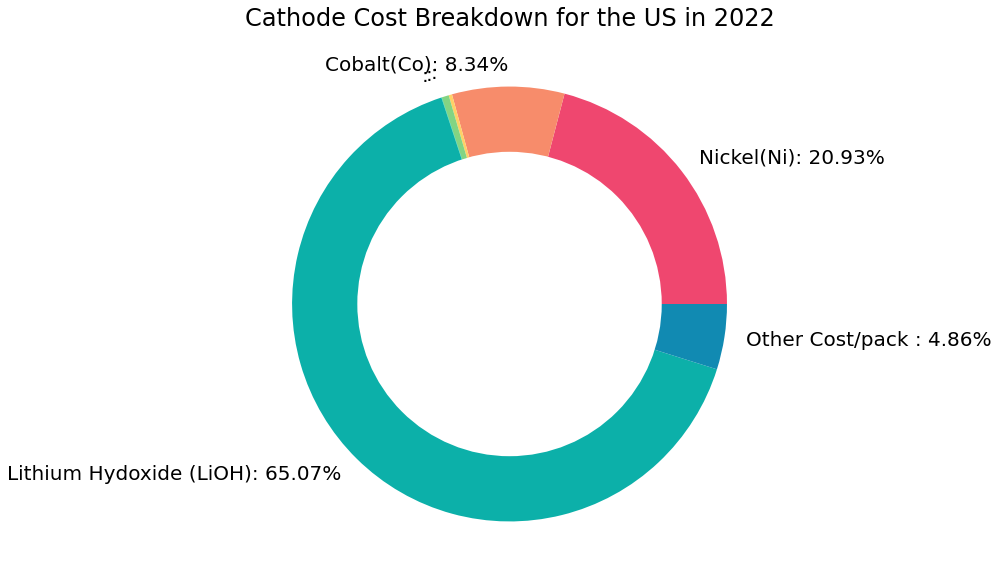

In [21]:
color=["#ef476f","#f78c6b","#ffd166","#83d483","#06d6a0","#0cb0a9","#118ab2","#073b4c"]
plt.pie(cathodedata811in2022us.iloc[0], colors=color, labels=listpie811, labeldistance=1.1, textprops={'color':"black",'fontsize': 20},)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Cathode Cost Breakdown for the US in 2022',fontsize=24)
fig.set_size_inches(15,10)


plt.savefig('Cathode Cost Breakdown for The US in 2022.png')
plt.savefig('Cathode Cost Breakdown for The US in 2022.svg')

plt.show()

In [22]:
#cathode composition comparison between 2 countries in 2022
cathodedata811in2022.set_index('country',inplace=True)
cathodedata811in2022.sort_values(cathodedata811in2022.last_valid_index(), axis=1,ascending=False, inplace=True)
cathodedata811in2022=cathodedata811in2022/packenergyNMC811

# drop(columns=cathodedata333in2022.columns[-1], 
#         axis=1, 
#         inplace=True)
cathodedata811in2022_total = cathodedata811in2022.sum(axis=1)
cathodedata811in2022_rel = cathodedata811in2022[cathodedata811in2022.columns].div(cathodedata811in2022_total, 0)*100
arrcathodedata811in2022=cathodedata811in2022_rel.transpose().to_numpy()
cathodedata811in2022_list= list(chain.from_iterable(arrcathodedata811in2022))
cathodedata811in2022_list
cathodedata811in2022

NMC811-G,Lithium Hydoxide (LiOH),Nickel(Ni),Cobalt(Co),Other Cost/pack,Sodium Hydroxide (NaOH),Manganese(Mn),Ammonium Hydroxide (NH4OH)
country,,,,,,,
US,60.236821,19.374163,7.719028,4.495276,0.491408,0.230838,0.028485
China,60.236821,19.374163,7.719028,4.495276,0.491408,0.230838,0.028485


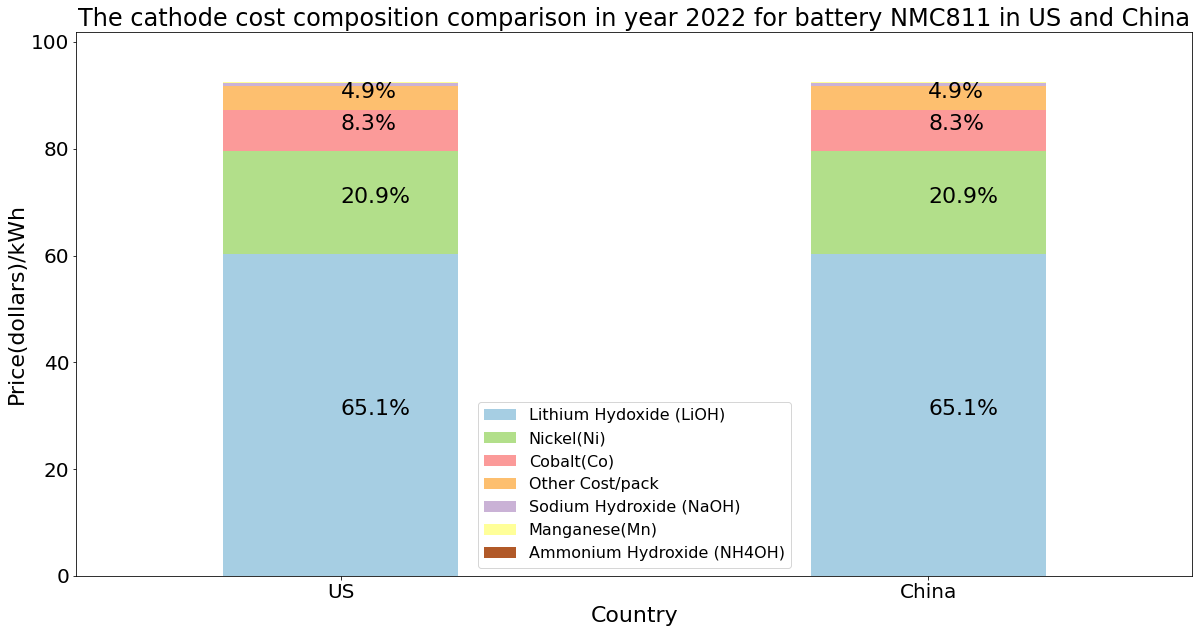

In [23]:

ax8112022 = cathodedata811in2022.plot(kind='bar', width=0.4,stacked=True, figsize=(20, 10), rot=0, xlabel='Class', ylabel='Count',colormap='Paired')
ax8112022.set_ylabel('Price(dollars)/kWh',fontsize=22)
ax8112022.set_xlabel('Country',fontsize=22)
ax8112022.set_title('The cathode cost composition comparison in year 2022 for battery NMC811 in US and China',fontsize=24)


for i,rec in enumerate(ax8112022.patches):
    if cathodedata811in2022_list[i]>1:
        ax8112022.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
                 '{:.1%}'.format(cathodedata811in2022_list[i]/100), fontsize=22, color='black')
plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.bar_label(ax8112022, x)
plt.margins(y=0.1)
plt.savefig('The cathode cost composition comparison in year 2022 for battery NMC811 in US and China.svg')

In [24]:
listofcost=['Cathode','Anode','Separator','Electrolyte','Other materials and maintenance (warranty+cell container)',
            'Module Construction','Pack Construction','Manufacturing, land, and depreciation']

In [25]:
#us cost comparison in 2020 and 2022 for NMC811
uswithyears=Wholedata.loc[[2020,2022]]
uswithyears=uswithyears[uswithyears['country']=='US']
uswithyears=uswithyears[uswithyears['Battery name']=='NMC811-G (Power)']
#uswithyears=uswithyears[uswithyears['country']=='US']
uswithyears=uswithyears[listofcost]
uswithyears=uswithyears/packenergyNMC811
uswithyears=uswithyears.rename(columns={'Other materials and maintenance (warranty+cell container)':'Other Materials'})  
uswithyears

,Cathode,Anode,Separator,Electrolyte,Other Materials,Module Construction,Pack Construction,"Manufacturing, land, and depreciation"
year,,,,,,,,
2020,34.808963,14.147563,4.351431,4.905709,6.994984,7.018083,17.135036,25.605682
2022,88.501315,14.111814,4.351431,4.905709,9.818022,6.873032,16.705114,24.620771


In [26]:
uswithyearstable=round(uswithyears.pct_change()*100,2)
uswithyearstable=uswithyearstable.transpose()
uswithyearstable=uswithyearstable.reset_index()
uswithyearstable=uswithyearstable[['index',2022]]
uswithyearstable

year,index,2022
0,Cathode,154.25
1,Anode,-0.25
2,Separator,0.00
3,Electrolyte,0.00
4,Other Materials,40.36
5,Module Construction,-2.07
6,Pack Construction,-2.51
7,"Manufacturing, land, and depreciation",-3.85


In [27]:
from itertools import chain
us_total = uswithyears.sum(axis=1)
us_rel = uswithyears[uswithyears.columns].div(us_total, 0)*100

arr=us_rel.transpose().to_numpy()
us_list= list(chain.from_iterable(arr))
us_list

[30.277233107909325,
 52.09416067866813,
 12.305712009535668,
 8.306578371376405,
 3.7849244246325817,
 2.561364764960582,
 4.26704153765051,
 2.8876269692550616,
 6.0843165595114606,
 5.779141427441888,
 6.1044088652512,
 4.045644143954953,
 14.90424946926851,
 9.833061564628027,
 22.272114026240743,
 14.492422079714936]

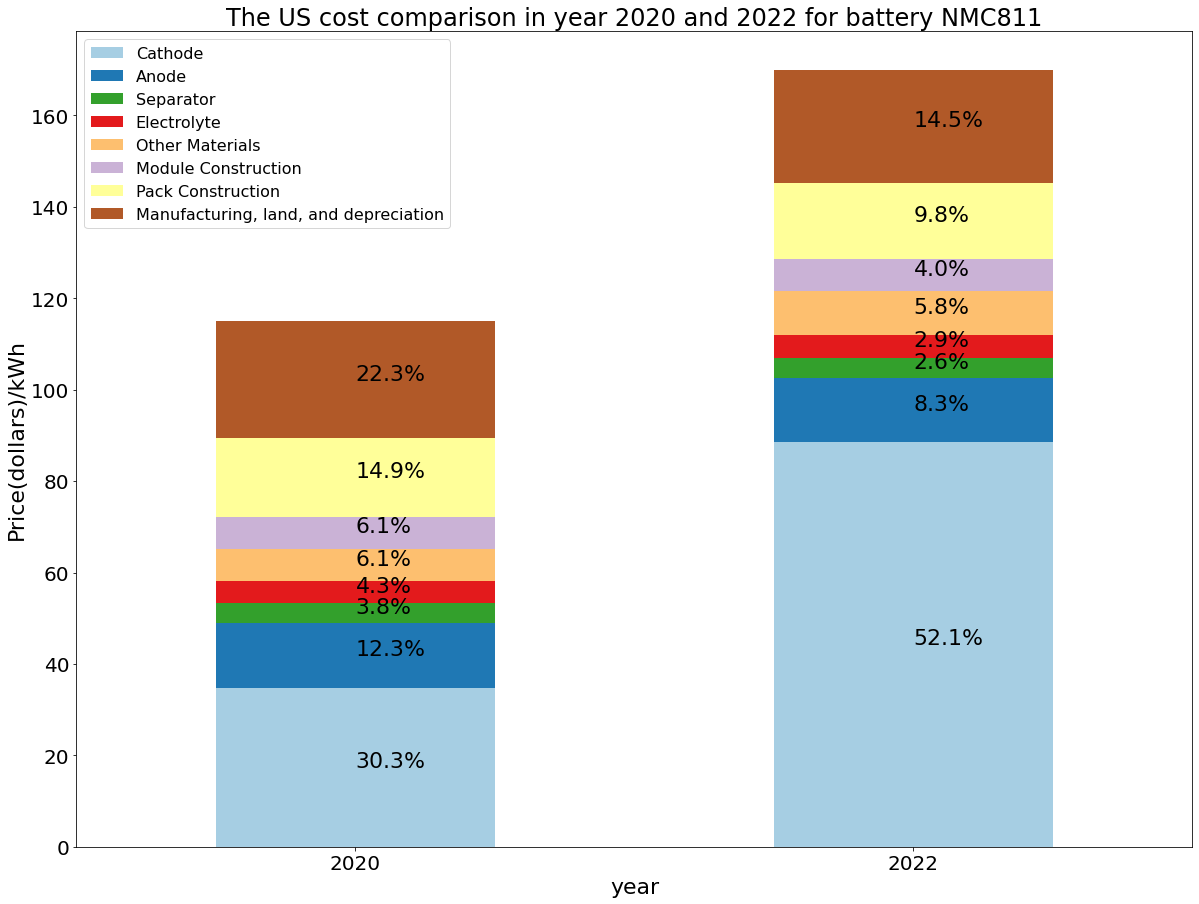

In [28]:

ax = uswithyears.plot(kind='bar', stacked=True, figsize=(20, 15), rot=0, xlabel='Class', ylabel='Count',colormap='Paired')
ax.set_ylabel('Price(dollars)/kWh',fontsize=22)
ax.set_xlabel('year',fontsize=22)
ax.set_title('The US cost comparison in year 2020 and 2022 for battery NMC811',fontsize=24)
plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
             '{:.1%}'.format(us_list[i]/100), fontsize=22, color='black')
    
plt.savefig('The US cost comparison in year 2020 and 2022 for battery NMC811.svg')


In [29]:
usNMC811in2022=Wholedata.loc[[2022]]
usNMC811in2022=usNMC811in2022[usNMC811in2022['country']=='US']
usNMC811in2022=usNMC811in2022[usNMC811in2022['Battery name']=='NMC811-G (Power)']
usNMC811in2022

,country,Battery name,Cathode,"Manufacturing, land, and depreciation",Anode,Separator,Electrolyte,Module Construction,Pack Construction,Other materials and maintenance (warranty+cell container),Total pack energy,"Target rated peak power of pack, kW",Pack Cost,Number of Pack manufactured per year,pack cost per kwh
year,,,,,,,,,,,,,,,
2022,US,NMC811-G (Power),3982.559185,1107.934707,635.031634,195.814399,220.756898,309.286435,751.73012,441.810991,45.0,125.0,7644.924371,200000.0,169.887208


In [30]:
usNMC811in2022=usNMC811in2022[listofcost]
usNMC811in2022=usNMC811in2022/packenergyNMC811
usNMC811in2022=usNMC811in2022.rename(columns={'Other materials and maintenance (warranty+cell container)':'Other Materials'})

usNMC811in2022

,Cathode,Anode,Separator,Electrolyte,Other Materials,Module Construction,Pack Construction,"Manufacturing, land, and depreciation"
year,,,,,,,,
2022,88.501315,14.111814,4.351431,4.905709,9.818022,6.873032,16.705114,24.620771


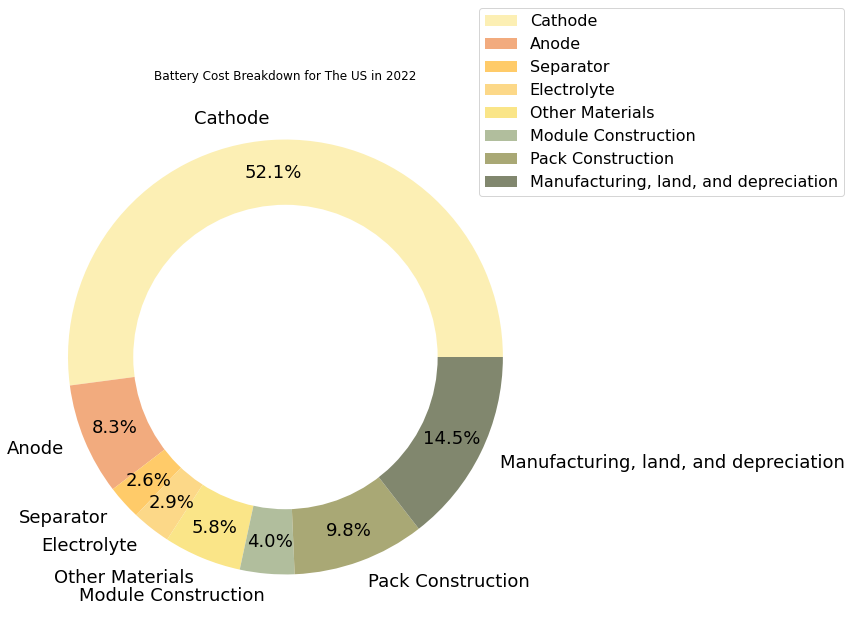

In [31]:
#donut graph to break down cost for The US in 2022

color=["#fcefb4","#f2ab7e","#ffcb69","#fcd888","#fae588","#b1be9d","#a9a875","#81876e"]

plt.pie(usNMC811in2022.iloc[0], colors=color, labels=usNMC811in2022.columns,autopct='%1.1f%%', pctdistance=0.85, textprops={'color':"black",'fontsize': 18})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')


fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Battery Cost Breakdown for The US in 2022')
fig.set_size_inches(15,10)
fig.legend(fontsize=16)
# Displaying Chart
plt.savefig('Battery Cost Breakdown for The US in 2022.png')
plt.savefig('Battery Cost Breakdown for The US in 2022.svg')

plt.show()

In [32]:
from itertools import chain
usNMC811in2022_total = usNMC811in2022.sum(axis=1)
usNMC811in2022_rel = usNMC811in2022[usNMC811in2022.columns].div(usNMC811in2022_total, 0)*100

arrusNMC811in2022=usNMC811in2022_rel.transpose().to_numpy()
usNMC811in2022_list= list(chain.from_iterable(arrusNMC811in2022))
usNMC811in2022_list

[52.09416067866813,
 8.306578371376405,
 2.561364764960582,
 2.8876269692550616,
 5.779141427441888,
 4.045644143954953,
 9.833061564628027,
 14.492422079714936]

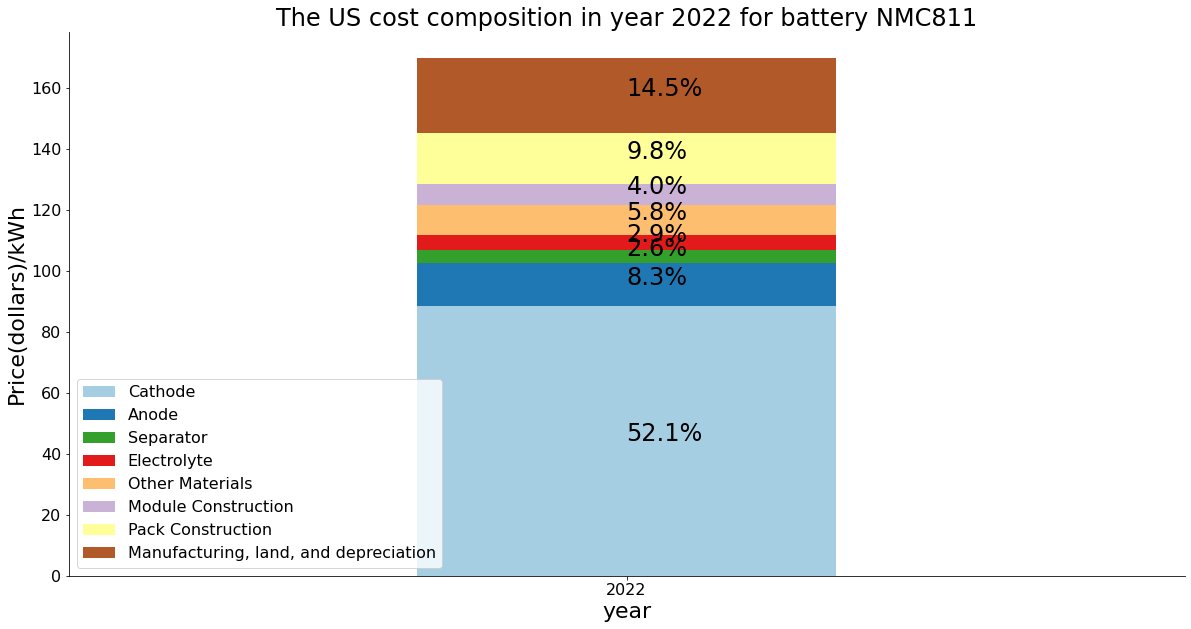

In [33]:
ax8112022 = usNMC811in2022.plot(kind='bar', width=0.3, stacked=True, figsize=(20, 10), rot=0, xlabel='Class', ylabel='Count',colormap='Paired')
ax8112022.set_ylabel('Price(dollars)/kWh',fontsize=22)
ax8112022.set_xlabel('year',fontsize=22)
ax8112022.set_title('The US cost composition in year 2022 for battery NMC811',fontsize=24)

plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax8112022.spines['top'].set_visible(False)
ax8112022.spines['right'].set_visible(False)

for i,rec in enumerate(ax8112022.patches):
    if usNMC811in2022_list[i]>1:
        ax8112022.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
                 '{:.1%}'.format(usNMC811in2022_list[i]/100), fontsize=24, color='black')
plt.savefig('The US cost composition in year 2022 for battery NMC811.svg')

In [34]:
usandchina2022=Wholedata.loc[2022]
usandchina2022=usandchina2022[usandchina2022['Battery name']=='NMC811-G (Power)']
usandchina2022=usandchina2022.set_index('country')
usandchina2022=usandchina2022[listofcost]
usandchina2022=usandchina2022/packenergyNMC811
usandchina2022=usandchina2022.rename(columns={'Other materials and maintenance (warranty+cell container)':'Other Materials'})
usandchina2022

,Cathode,Anode,Separator,Electrolyte,Other Materials,Module Construction,Pack Construction,"Manufacturing, land, and depreciation"
country,,,,,,,,
US,88.501315,14.111814,4.351431,4.905709,9.818022,6.873032,16.705114,24.620771
China,85.757625,14.111814,4.351431,4.905709,9.578303,6.873032,16.705114,23.083770


In [35]:
from itertools import chain
uschina2022_total = usandchina2022.sum(axis=1)
uschina2022_rel = usandchina2022[usandchina2022.columns].div(uschina2022_total, 0)*100

arrusandchina2022=uschina2022_rel.transpose().to_numpy()
usandchina2022_list= list(chain.from_iterable(arrusandchina2022))
usandchina2022_list

[52.09416067866813,
 51.85903459864208,
 8.306578371376405,
 8.533644168835872,
 2.561364764960582,
 2.631381359873414,
 2.8876269692550616,
 2.966562156672154,
 5.779141427441888,
 5.792156238993703,
 4.045644143954953,
 4.156234494483619,
 9.833061564628027,
 10.10185478679687,
 14.492422079714936,
 13.959132195702297]

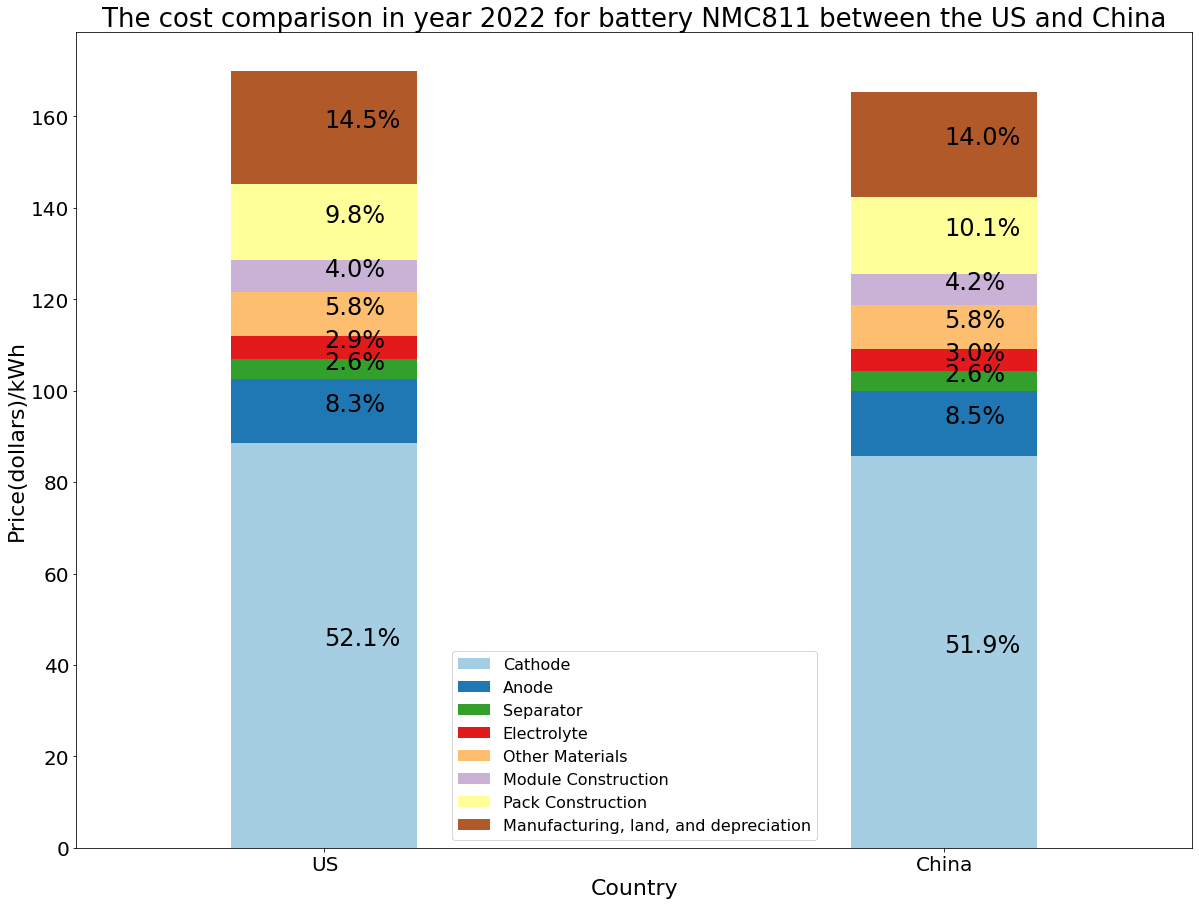

In [36]:
#cost comparison in 2 years 
ax = usandchina2022.plot(kind='bar', width=0.3, stacked=True, figsize=(20,15), rot=0,  ylabel='Count',colormap='Paired')
ax.set_ylabel('Price(dollars)/kWh',fontsize=22)
ax.set_xlabel('Country',fontsize=22)
ax.set_title('The cost comparison in year 2022 for battery NMC811 between the US and China',fontsize=26)
plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
             '{:.1%}'.format(usandchina2022_list[i]/100), fontsize=24, color='black')

plt.savefig('The cost comparison in year 2022 for battery NMC811 between the US and China.svg')

In [37]:
#us and China cost comparison in 2020 for NMC811
usandchina2020=Wholedata.loc[2020]
usandchina2020=usandchina2020[usandchina2020['Battery name']=='NMC811-G (Power)']
usandchina2020=usandchina2020.set_index('country')
usandchina2020=usandchina2020[listofcost]
usandchina2020=usandchina2020/packenergyNMC811
usandchina2020=usandchina2020.rename(columns={'Other materials and maintenance (warranty+cell container)':'Other Materials'})
usandchina2020

,Cathode,Anode,Separator,Electrolyte,Other Materials,Module Construction,Pack Construction,"Manufacturing, land, and depreciation"
country,,,,,,,,
US,34.808963,14.147563,4.351431,4.905709,6.994984,7.018083,17.135036,25.605682
China,31.553614,14.147563,4.351431,4.905709,6.720971,7.018083,17.135036,23.967944


In [38]:
from itertools import chain
uschina2020_total = usandchina2020.sum(axis=1)
uschina2020_rel = usandchina2020[usandchina2020.columns].div(uschina2020_total, 0)*100

arrusandchina2020=uschina2020_rel.transpose().to_numpy()
usandchina2020_list= list(chain.from_iterable(arrusandchina2020))
usandchina2020_list

[30.277233107909325,
 28.737261641491802,
 12.305712009535668,
 12.884806944981838,
 3.7849244246325817,
 3.963039316615492,
 4.26704153765051,
 4.467844395857908,
 6.0843165595114606,
 6.1210831370090775,
 6.1044088652512,
 6.391676457327172,
 14.90424946926851,
 15.605629070675691,
 22.272114026240743,
 21.828659036041003]

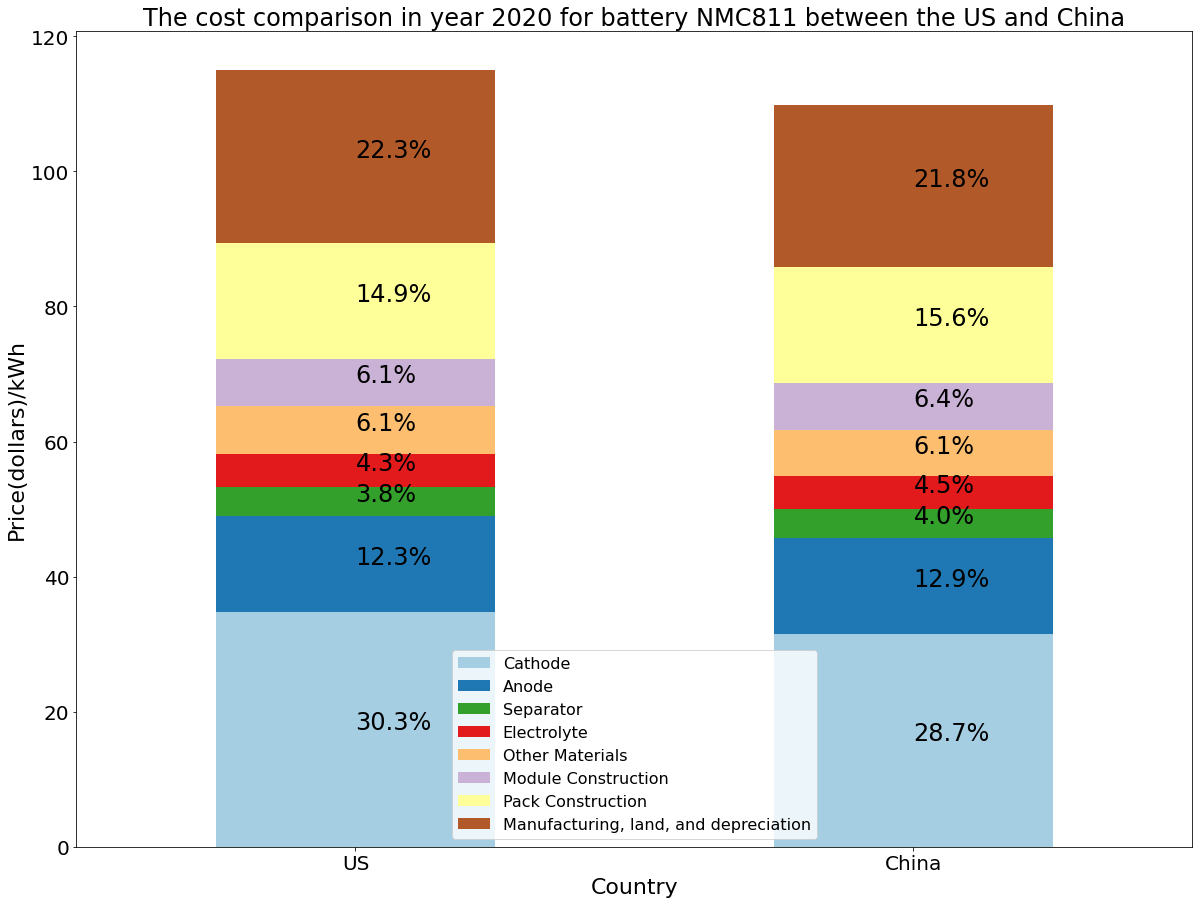

In [39]:
#cost comparison in 2 years 
ax = usandchina2020.plot(kind='bar', stacked=True, figsize=(20, 15), rot=0,  ylabel='Count',colormap='Paired')
ax.set_ylabel('Price(dollars)/kWh',fontsize=22)
ax.set_xlabel('Country',fontsize=22)
ax.set_title('The cost comparison in year 2020 for battery NMC811 between the US and China',fontsize=24)
plt.legend(fontsize=16,loc=8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
             '{:.1%}'.format(usandchina2020_list[i]/100), fontsize=24, color='black')
    
plt.savefig('The cost comparison in year 2020 for battery NMC811 between the US and China.svg')

In [40]:
yeartrend=[]
startyear=2018
for i in range(5):
    yeartrend.append(startyear+i)
#listofyears=np.linspace(2015, 2030,1)
print(yeartrend)

[2018, 2019, 2020, 2021, 2022]


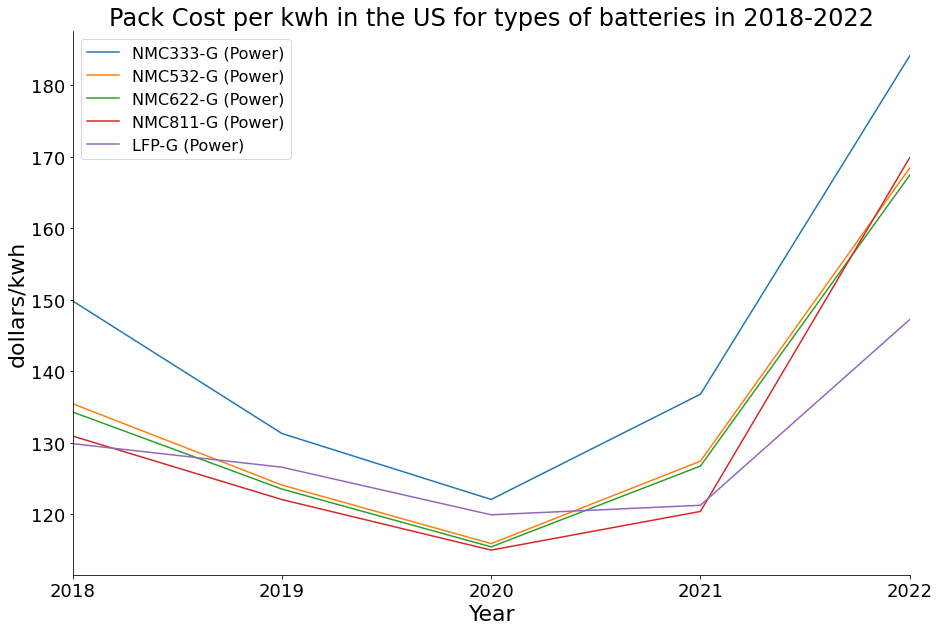

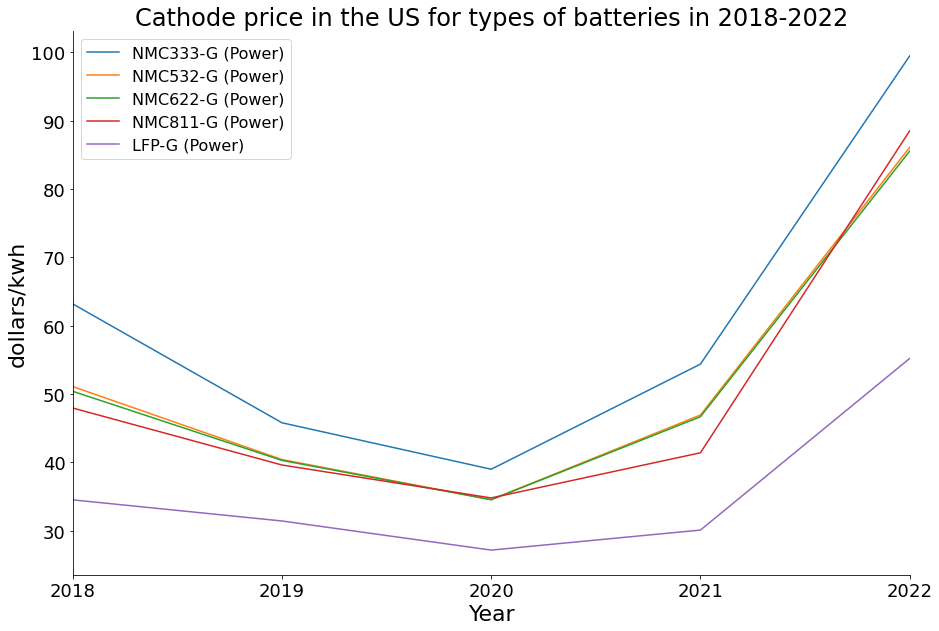

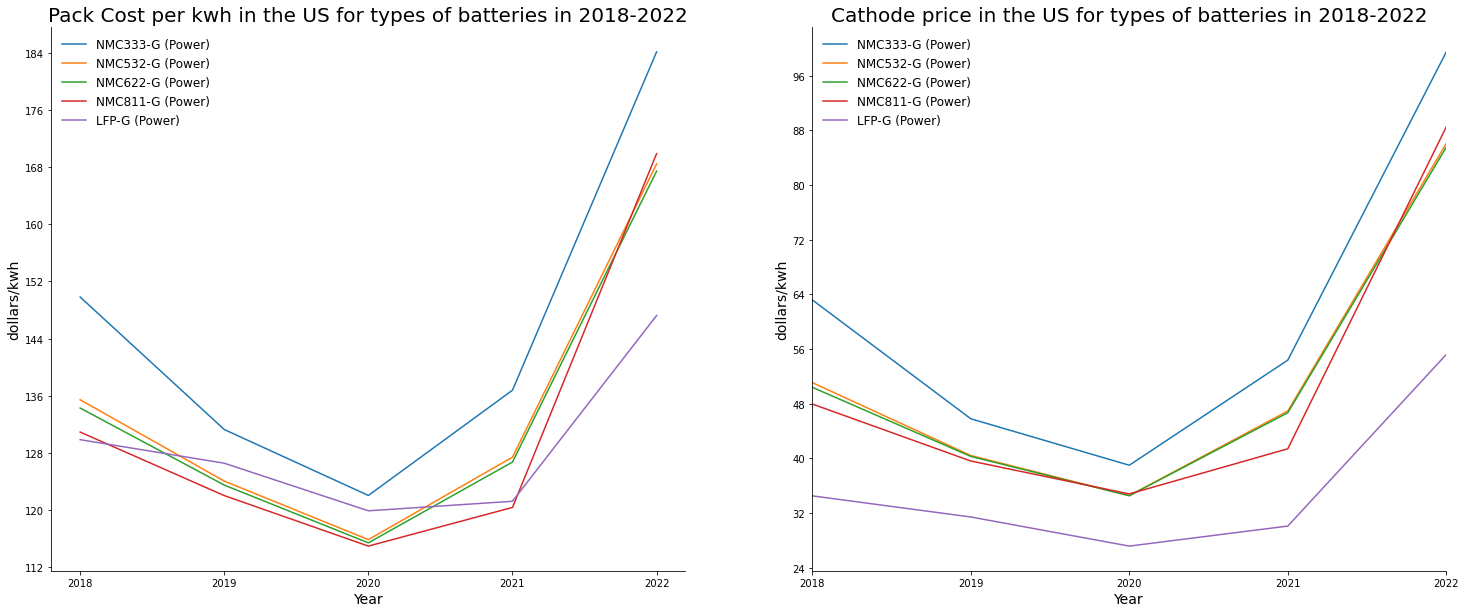

In [41]:
#trend of pack cost/kwh for us
uspackcost=Wholedata[Wholedata['country']=='US']
uspackcost=uspackcost.loc[yeartrend,:]
#uspackcost_grouped=uspackcost.groupby('Battery name')
uspackcost['cathode cost per kwh']=uspackcost['Cathode']/uspackcost['Total pack energy']
#uspackcost[yeartrend,:]
uspackcost



type(uspackcost.index)

#uspackcost.index=pd.to_datetime(uspackcost.index.astype(str), format='%Y.')
#uspackcost.head(5)





#'Pack Cost per kwh in the US for types of batteries in 2015-2022'

from matplotlib.ticker import MaxNLocator
uspackcost= uspackcost.sort_index()


fig, ax = plt.subplots(figsize=(15,10))


for battery in listofbattery:
    ax.plot(uspackcost[uspackcost['Battery name']==battery].index, uspackcost[uspackcost['Battery name']==battery]['pack cost per kwh'], label = battery)   

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.legend(frameon=False,fontsize=12)
ax.set_title('Pack Cost per kwh in the US for types of batteries in 2018-2022',fontsize=24)
ax.set_ylabel('dollars/kwh',fontsize=22)
ax.set_xlabel('Year', fontsize=22)
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([2018, 2022])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig('Pack Cost per kwh in the US for types of batteries in 2018-2022.svg')
plt.show()


#cathode trend in the us
uspackcost= uspackcost.sort_index()

fig, ax = plt.subplots(figsize=(15,10))
for battery in listofbattery:
    ax.plot(uspackcost[uspackcost['Battery name']==battery].index, uspackcost[uspackcost['Battery name']==battery]['cathode cost per kwh'], label = battery)   

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.legend(frameon=False,fontsize=12)
ax.set_title('Cathode price in the US for types of batteries in 2018-2022',fontsize=24)
ax.set_ylabel('dollars/kwh',fontsize=22)
ax.set_xlabel('Year', fontsize=22)
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([2018, 2022])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))



plt.savefig('Cathode price in the US for types of batteries in 2018-2022.svg')

plt.show()


#cathode trend and pack post/kwh comparison graph
uspackcost= uspackcost.sort_index()

fig, ax = plt.subplots(1,2, figsize=(25,10))
for battery in listofbattery:
    ax[0].plot(uspackcost[uspackcost['Battery name']==battery].index, uspackcost[uspackcost['Battery name']==battery]['pack cost per kwh'], label = battery)   

for battery in listofbattery:
    ax[1].plot(uspackcost[uspackcost['Battery name']==battery].index, uspackcost[uspackcost['Battery name']==battery]['cathode cost per kwh'], label = battery)   

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


ax[0].legend(frameon=False,fontsize=12)
ax[0].set_title('Pack Cost per kwh in the US for types of batteries in 2018-2022',fontsize=20)
ax[0].set_ylabel('dollars/kwh',fontsize=14)
ax[0].set_xlabel('Year', fontsize=14)


ax[1].legend(frameon=False,fontsize=12)
ax[1].set_title('Cathode price in the US for types of batteries in 2018-2022',fontsize=20)
ax[1].set_ylabel('dollars/kwh',fontsize=14)
ax[1].set_xlabel('Year', fontsize=14)
ax[1].yaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))

ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlim([2018, 2022])
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlim([2018, 2022])
plt.savefig('cathode trend comparison.svg')
plt.show()


#Trend is overall the same, except for battery lfp

